# **Predicting Customer Churn in a Telecom Company**

## **Problem description:**

A telecom company is facing a high customer churn rate and wants to reduce it.
Customer churn refers to the process where a customer stops doing business with a
company. In the telecom industry, customer churn is a major problem as acquiring new
customers is more expensive than retaining existing customers. The company wants to
use machine learning to predict which customers are likely to churn so that they can
take proactive measures to retain them.

## **About Dataset:**

CustomerID: A unique ID that identifies each customer.

Gender: The customer’s gender: Male, Female

Age: The customer’s current age, in years, at the time the fiscal quarter ended.

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Married (Partner): Indicates if the customer is married: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Number of Dependents: Indicates the number of dependents that live with the customer.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Tenure: Indicates the total amount of months that the customer has been with the company.

Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

In [2]:
import pandas as pd # A library for data manipulation and analysis.
import seaborn as sns #A library for data visualization built on top of matplotlib.
import numpy as np #A library for numerical computing in Python.
from matplotlib import pyplot as plt#A module within the matplotlib library that provides a simple interface 
#for creating various types of plots, such as line plots, scatter plots, and bar charts.

Loading Dataset

In [3]:
#read_excel() function is used to read an Excel file and returns a DataFrame. 
df = pd.read_excel('/content/train.xlsx')

In [4]:
df.shape

(7043, 21)

In [5]:
#df.head() function is used to display the first 5 rows of the pandas dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#drop() method is used to remove rows or columns from a pandas dataframe
df = df.drop("customerID",axis=1)

In [7]:

#df.info() function is used to display information about the pandas dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
#converts the "TotalCharges" column in the pandas dataframe df from a string datatype to a numeric datatype
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')

In [9]:
##df.info() function is used to display information about the pandas dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
#count the number of missing values in each column of the dataframe 
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
#selects all rows in the pandas dataframe df where the "TotalCharges" column contains a missing value (NaN).
df[df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
#df.shape returns the number of rows and columns present in a dataframe
df.shape

(7043, 20)

In [13]:
#fills missing values in the "TotalCharges" column of a pandas dataframe with the median value of the column.
df.TotalCharges.fillna(df.TotalCharges.median(),inplace = True)

In [47]:
#df.shape returns the number of rows and columns present in a dataframe
df.shape

(7043, 20)

In [14]:
#df.dtypes is a pandas method that returns the data type of each column in a dataframe.
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

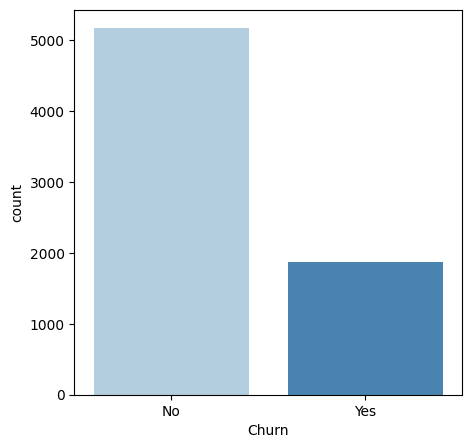

In [15]:
#creates a count plot using Seaborn library to visualize the distribution of a categorical variable 'Churn' in the dataframe
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df['Churn'],palette='Blues',linewidth=1)
plt.show()

<Axes: ylabel='Churn'>

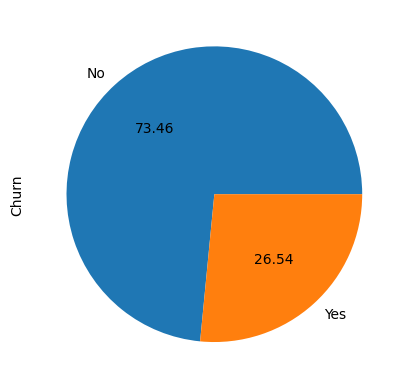

In [16]:
#code snippet creates a pie chart to visualize the distribution of a categorical variable 'Churn' in the dataframe
df['Churn'].value_counts().plot(kind="pie",autopct="%0.2f")

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


      Churn  Contract  Dependents  DeviceProtection  InternetService  \
0     False     False       False             False            False   
1     False     False       False             False            False   
2     False     False       False             False            False   
3     False     False       False             False            False   
4     False     False       False             False            False   
...     ...       ...         ...               ...              ...   
7038  False     False       False             False            False   
7039  False     False       False             False            False   
7040  False     False       False             False            False   
7041  False     False       False             False            False   
7042  False     False       False             False            False   

      MonthlyCharges  MultipleLines  OnlineBackup  OnlineSecurity  \
0              False          False         False           False 

<ipython-input-18-99fef417bd40>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


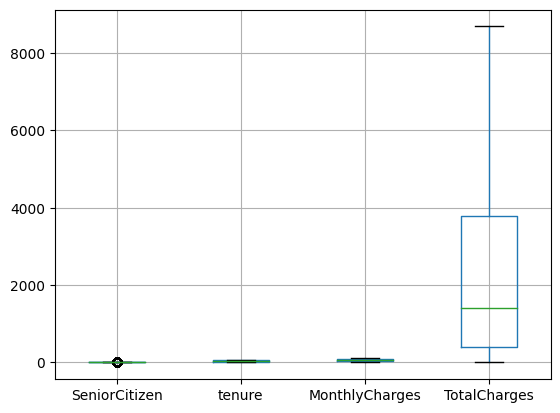

In [18]:
# create boxplots
df.boxplot()

# identify outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print(outliers)

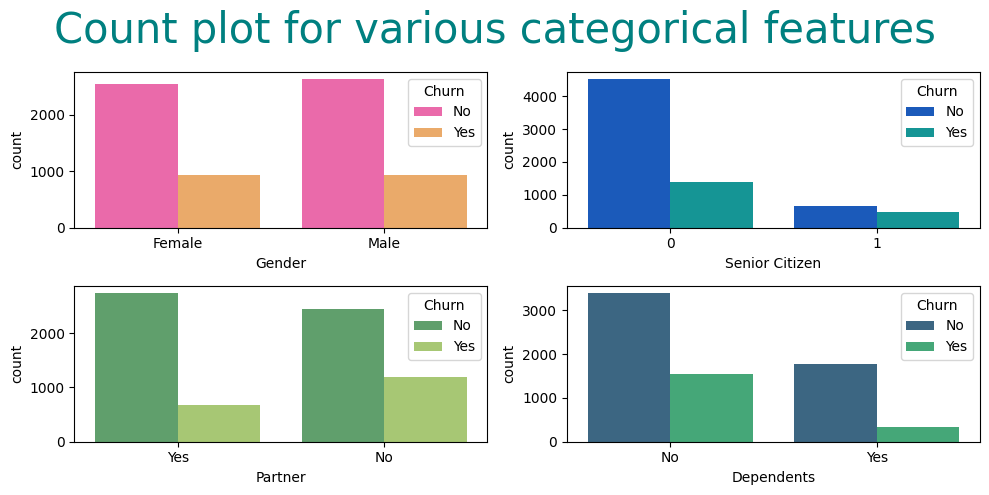

In [19]:
#code snippet creates a figure with 4 subplots, each of which shows a count plot for a different categorical feature in the 'df' dataframe.
#plt.suptitle() method sets a title for the entire figure.
fig, ax = plt.subplots(2, 2, figsize = (10, 5))
plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='gender', data= df, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Gender')

ax2 = sns.countplot(x ='SeniorCitizen', data= df, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Senior Citizen')

ax3 = sns.countplot(x ='Partner', data= df, hue= 'Churn', ax= ax[1, 0], palette= 'summer')
ax3.set(xlabel = 'Partner')

ax4 = sns.countplot(x ='Dependents', data= df, hue= 'Churn', ax= ax[1, 1], palette= 'viridis')
ax4.set(xlabel = 'Dependents')

plt.tight_layout()
plt.show()

Based on the above information, it is clear that Senior Citizens are much more likely to churn, also, customers not having a partner have higher chances of churning as compared to customers who do have a partner.

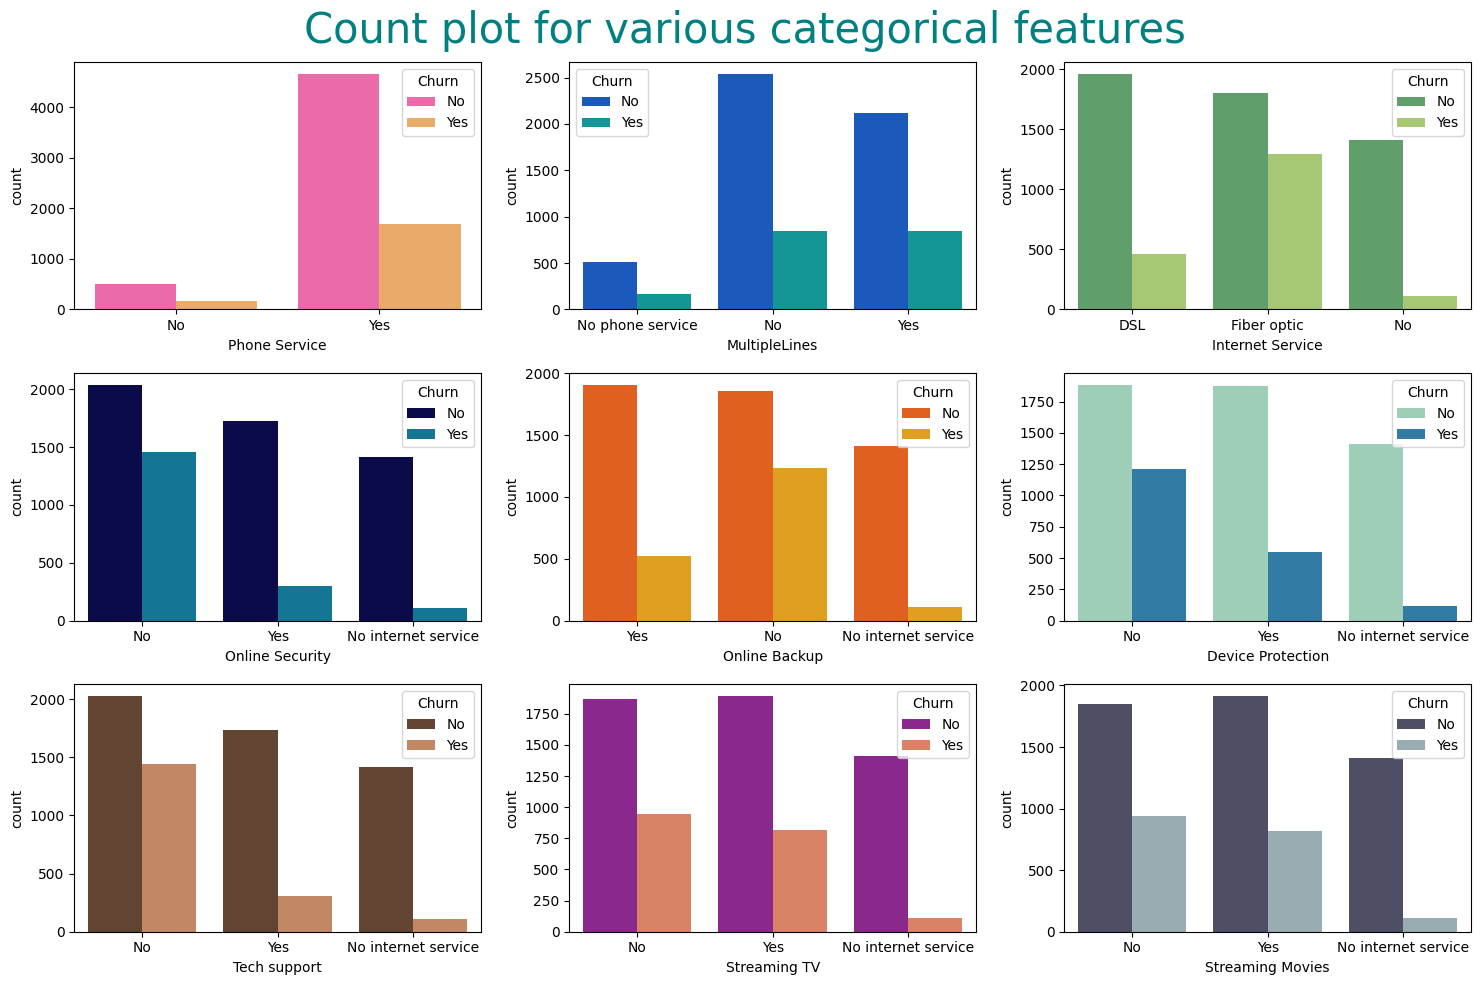

In [20]:
#creates a figure with 9 subplots, each of which shows a count plot for a different categorical feature in the 'df' dataframe.
fig, ax = plt.subplots(3, 3, figsize = (15,10))

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='PhoneService', data= df, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Phone Service')

ax2 = sns.countplot(x ='MultipleLines', data= df, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'MultipleLines')

ax3 = sns.countplot(x ='InternetService', data= df, hue= 'Churn', ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Internet Service')

ax4 = sns.countplot(x ='OnlineSecurity', data= df, hue= 'Churn', ax= ax[1, 0], palette= 'ocean')
ax4.set(xlabel = 'Online Security')

ax5 = sns.countplot(x ='OnlineBackup', data= df, hue= 'Churn', ax= ax[1, 1], palette= 'autumn')
ax5.set(xlabel = 'Online Backup')

ax6 = sns.countplot(x ='DeviceProtection', data= df, hue= 'Churn', ax= ax[1, 2], palette= 'YlGnBu')
ax6.set(xlabel = 'Device Protection')

ax7 = sns.countplot(x ='TechSupport', data= df, hue= 'Churn', ax= ax[2, 0], palette= 'copper')
ax7.set(xlabel = 'Tech support')

ax8 = sns.countplot(x ='StreamingTV', data= df, hue= 'Churn', ax= ax[2, 1], palette= 'plasma')
ax8.set(xlabel = 'Streaming TV')

ax9 = sns.countplot(x ='StreamingMovies', data= df, hue= 'Churn', ax= ax[2, 2], palette= 'bone')
ax9.set(xlabel = 'Streaming Movies')

plt.tight_layout()
plt.show()

Customers having Fiber optic internet service are much more likely to churn then customers who don't

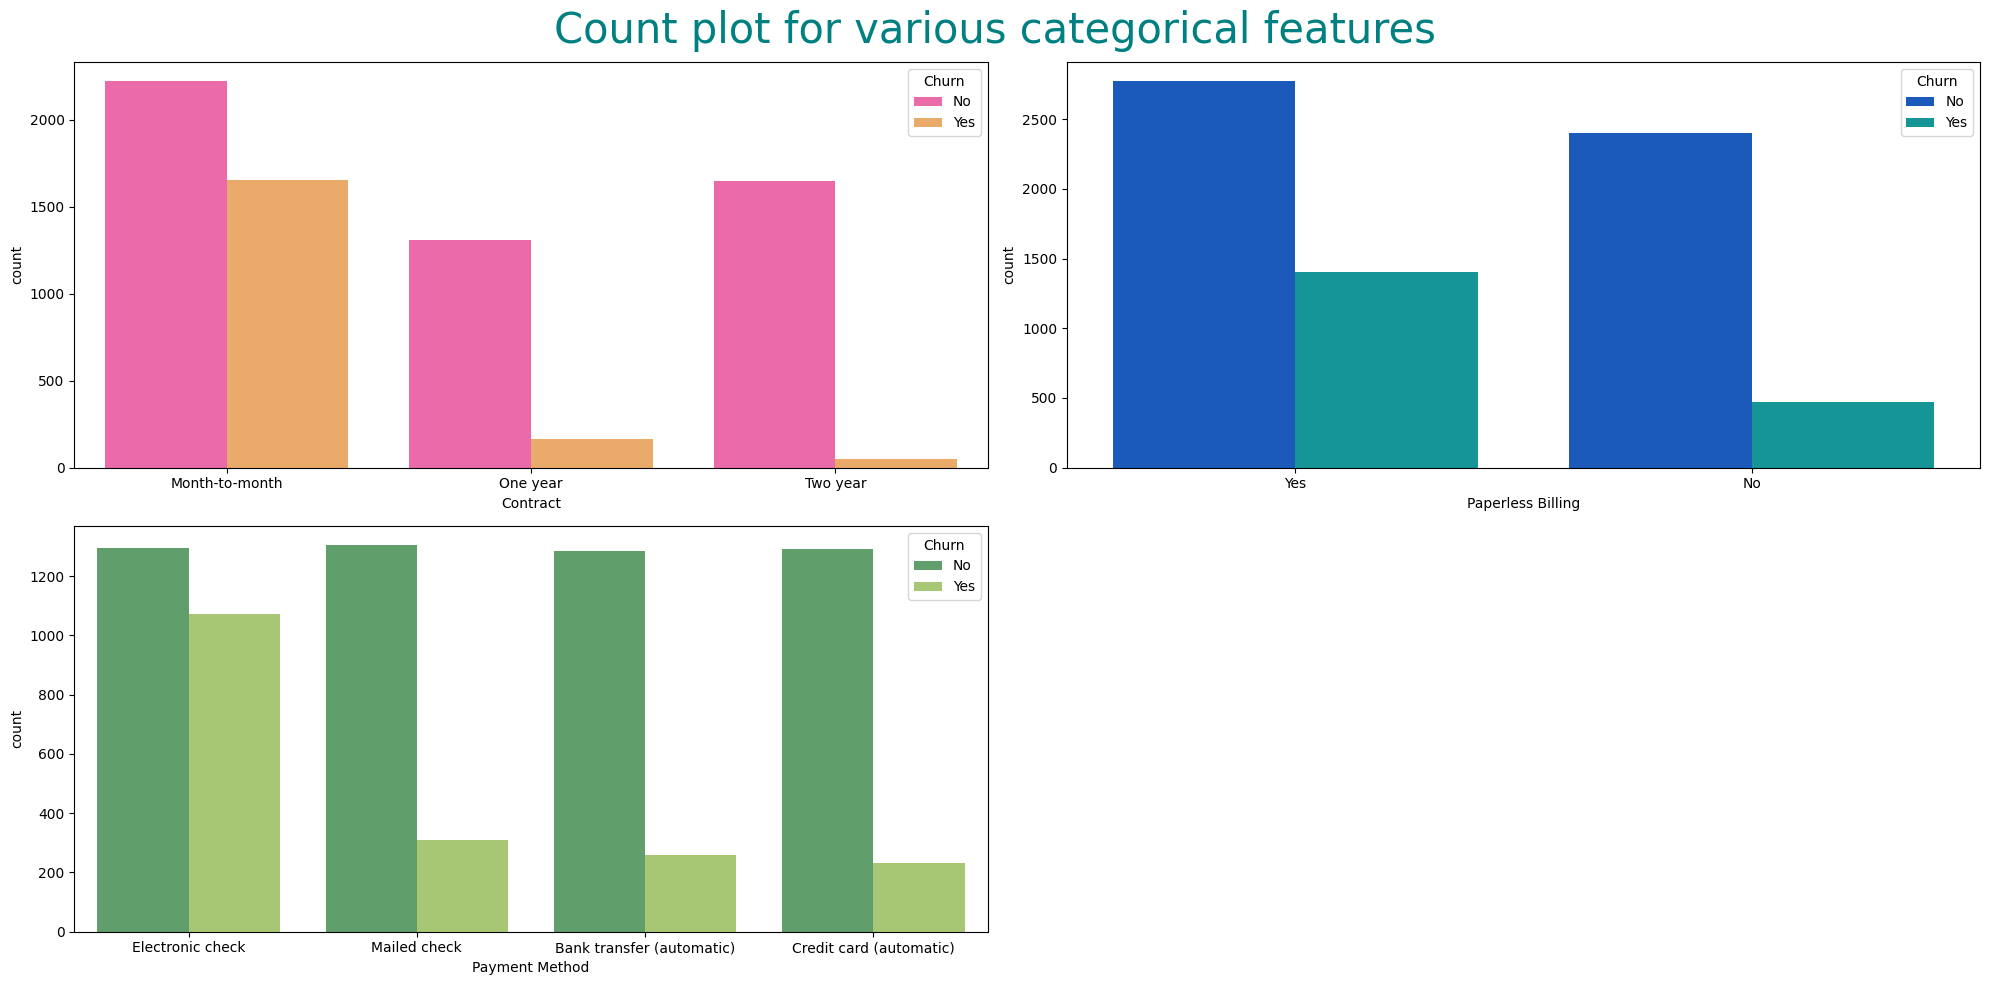

In [21]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax[1, 1].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='Contract', data= df, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Contract')

ax2 = sns.countplot(x ='PaperlessBilling', data= df, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Paperless Billing')

ax3 = sns.countplot(x ='PaymentMethod', data= df, hue= 'Churn', ax= ax[1, 0], palette= 'summer')
ax3.set(xlabel = 'Payment Method')

plt.tight_layout()
plt.show()

In [22]:
#code snippet selects all the columns in the 'df' dataframe where the data type is 'object' and assigns them to a variable 'col'.
col = df.columns[df.dtypes=="object"]

In [23]:
#code snippet prints the unique values in each column of the dataframe 'df' where the data type is 'object'.
for i in col:
    un = df[i].unique()
    print("{} || {}".format(i,un))

gender || ['Female' 'Male']
Partner || ['Yes' 'No']
Dependents || ['No' 'Yes']
PhoneService || ['No' 'Yes']
MultipleLines || ['No phone service' 'No' 'Yes']
InternetService || ['DSL' 'Fiber optic' 'No']
OnlineSecurity || ['No' 'Yes' 'No internet service']
OnlineBackup || ['Yes' 'No' 'No internet service']
DeviceProtection || ['No' 'Yes' 'No internet service']
TechSupport || ['No' 'Yes' 'No internet service']
StreamingTV || ['No' 'Yes' 'No internet service']
StreamingMovies || ['No' 'Yes' 'No internet service']
Contract || ['Month-to-month' 'One year' 'Two year']
PaperlessBilling || ['Yes' 'No']
PaymentMethod || ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn || ['No' 'Yes']


In [24]:
#code snippet prints the frequency count of each unique value in each column of the dataframe 'df' where the data type is 'object'.
for i in col:
    un = df[i].value_counts()
    print("{} \n {} \n\n".format(i,un))

gender 
 Male      3555
Female    3488
Name: gender, dtype: int64 


Partner 
 No     3641
Yes    3402
Name: Partner, dtype: int64 


Dependents 
 No     4933
Yes    2110
Name: Dependents, dtype: int64 


PhoneService 
 Yes    6361
No      682
Name: PhoneService, dtype: int64 


MultipleLines 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 


InternetService 
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 


OnlineSecurity 
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 


OnlineBackup 
 No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 


DeviceProtection 
 No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 


TechSupport 
 No                     3473
Yes             

In [25]:
#'col' variable contains a list of column names in the dataframe 'df' where the data type is 'object'.
col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [26]:
#returns the first 5 rows of the dataframe 'df' using the .head() method.
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
#code snippet uses the LabelEncoder class from the sklearn.preprocessing module to convert categorical variables in the dataframe 'df' to numeric format.
from sklearn.preprocessing import LabelEncoder
for i in col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [28]:
##returns the first 5 rows of the dataframe 'df' using the .head() method.
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [29]:
#df.info() function is used to display information about the pandas dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


<Axes: >

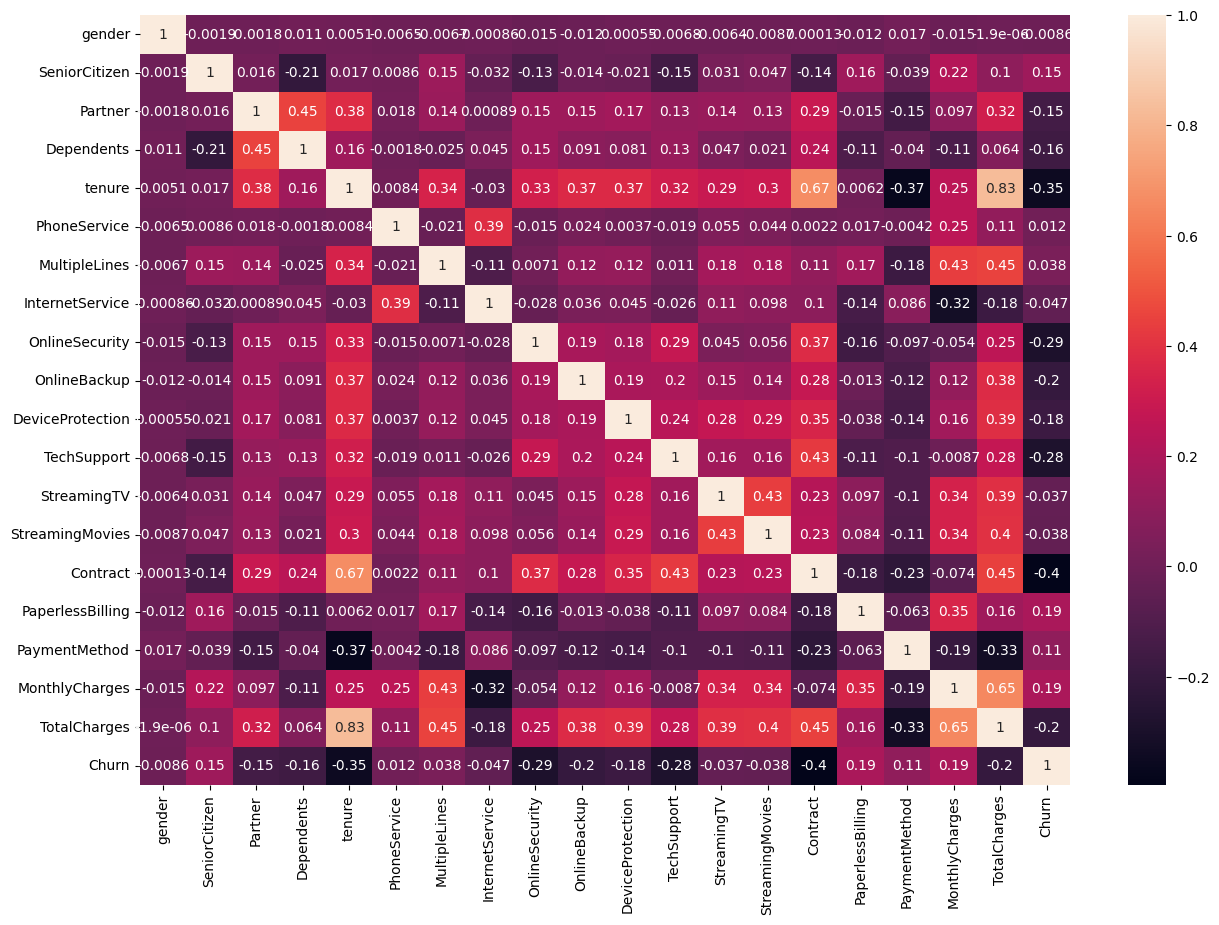

In [30]:
#code snippet uses the heatmap function from the seaborn module to plot a heatmap of the correlation matrix of the dataframe 'df
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [31]:
from imblearn.over_sampling import SMOTE

# Separate the target variable from the features
X = df.drop('Churn', axis=1)
y = df['Churn']

# Create an instance of SMOTE
smote = SMOTE()

# Fit and apply SMOTE
X_r, y_r = smote.fit_resample(X, y)


In [32]:
df1=pd.read_excel('test.xlsx')

In [33]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,25,Yes,No,Fiber optic,Yes,no,yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.00,2787.00
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30.00,30.00
2,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
3,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
4,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [34]:
col1 = df1.columns[df1.dtypes=="object"]

In [35]:
##code snippet prints the unique values in each column of the dataframe 'df' where the data type is 'object'.
for i in col1:
    un = df1[i].unique()
    print("{} || {}".format(i,un))

gender || ['Male' 'Female']
Partner || ['No' 'Yes']
Dependents || ['No' 'Yes']
PhoneService || ['Yes' 'No']
MultipleLines || ['No' 'No phone service' 'Yes']
InternetService || ['Fiber optic' 'DSL' 'No']
OnlineSecurity || ['Yes' 'No' 'No internet service']
OnlineBackup || ['no' 'Yes' 'No' 'No internet service']
DeviceProtection || ['yes' 'No' 'Yes' 'No internet service']
TechSupport || ['Yes' 'No' 'No internet service']
StreamingTV || ['Yes' 'No' 'No internet service']
StreamingMovies || ['Yes' 'No' 'No internet service']
Contract || ['Month-to-month' 'One year' 'Two year']
PaperlessBilling || ['Yes' 'No']
PaymentMethod || ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [36]:
#code snippet prints the frequency count of each unique value in each column of the dataframe 'df' where the data type is 'object'.
for i in col1:
    un = df1[i].value_counts()
    print("{} \n {} \n\n".format(i,un))

gender 
 Male      12
Female     8
Name: gender, dtype: int64 


Partner 
 No     13
Yes     7
Name: Partner, dtype: int64 


Dependents 
 No     17
Yes     3
Name: Dependents, dtype: int64 


PhoneService 
 Yes    14
No      6
Name: PhoneService, dtype: int64 


MultipleLines 
 No                  9
No phone service    6
Yes                 5
Name: MultipleLines, dtype: int64 


InternetService 
 DSL            10
Fiber optic     9
No              1
Name: InternetService, dtype: int64 


OnlineSecurity 
 No                     10
Yes                     9
No internet service     1
Name: OnlineSecurity, dtype: int64 


OnlineBackup 
 No                     9
Yes                    8
no                     2
No internet service    1
Name: OnlineBackup, dtype: int64 


DeviceProtection 
 No                     10
Yes                     7
yes                     2
No internet service     1
Name: DeviceProtection, dtype: int64 


TechSupport 
 No                     14
Yes                

In [37]:
col1

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [38]:
# code snippet uses the LabelEncoder class from the sklearn.preprocessing module to convert categorical variables in the dataframe 'df' to numeric format.
for i in col1:
    le = LabelEncoder()
    df1[i] = le.fit_transform(df1[i])

In [39]:
#applied the StandardScaler from scikit-learn on the feature matrix X. This scales the features so that each feature has a mean of 0 and a variance of 1.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [59]:
#These lines of code split the data into training and testing sets. X_r is the feature set and y_r is the target variable. 
#train_size=0.75 indicates that 75% of the data will be used for training
#The training data is assigned to X_train and y_train, while the testing data is assigned to X_test and y_test.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_r,y_r,train_size=0.75,random_state=0)

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

## RandomForestClassifier



In [78]:
#trains a Random Forest Classifier model on the training data.
#This will create a random forest classifier model, fit it to the training data,
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
 #predict the churn values for the test data, and calculate the accuracy score.
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8422883649014302

In [80]:
y_pred0=model.predict(df1)

In [81]:
y_pred0

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [82]:
confusion_matrix(y_test,y_pred)

array([[1067,  223],
       [ 185, 1112]])

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1290
           1       0.83      0.86      0.84      1297

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587



In [84]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)

In [85]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [86]:
model_smote=DecisionTreeClassifier()

In [87]:
model_smote.fit(xr_train,yr_train)
yr_predict = model_smote.predict(xr_test)
model_score_r = model_smote.score(xr_test, yr_test)
print(model_score_r)
print(classification_report(yr_test, yr_predict))

0.9449321628092577
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       562
           1       0.95      0.95      0.95       691

    accuracy                           0.94      1253
   macro avg       0.94      0.94      0.94      1253
weighted avg       0.94      0.94      0.94      1253



In [88]:
print(confusion_matrix(yr_test, yr_predict))

[[529  33]
 [ 36 655]]


## Decision Tree Classifier

In [50]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred = model1.predict(X_test)
accuracy_score(y_test,y_pred)

0.782759953614225

In [52]:
confusion_matrix(y_test,y_pred)

array([[ 996,  294],
       [ 268, 1029]])

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1290
           1       0.78      0.79      0.79      1297

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587



As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [74]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)

In [89]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [91]:
model1_smote=DecisionTreeClassifier()

In [94]:
model1_smote.fit(xr_train,yr_train)
yr_predict = model1_smote.predict(xr_test)
model_score_r = model1_smote.score(xr_test, yr_test)
print(model_score_r)
print(classification_report(yr_test, yr_predict))

0.9345570630486831
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       535
           1       0.94      0.94      0.94       718

    accuracy                           0.93      1253
   macro avg       0.93      0.93      0.93      1253
weighted avg       0.93      0.93      0.93      1253



In [95]:
print(confusion_matrix(yr_test, yr_predict))

[[495  40]
 [ 42 676]]


## Logistic Regression

In [97]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = model1.predict(X_test)
accuracy_score(y_test,y_pred)

0.7935833011209895

In [99]:
confusion_matrix(y_test,y_pred)

array([[ 977,  313],
       [ 221, 1076]])

In [103]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10)
model1 = LogisticRegression()

results = cross_val_score(model1, x,y, cv=kfold)
results.min(),results.max()

(0.7869318181818182, 0.8323863636363636)

In [104]:
#Apply Random Forest
from sklearn.ensemble import RandomForestClassifier


kfold = KFold(n_splits=10)
model2 = RandomForestClassifier()

results = cross_val_score(model2, x,y, cv=kfold)

print("Average Accuracy",results.mean())

Average Accuracy 0.7919894422952934


In [106]:
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [107]:
models = []
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGboost',XGBClassifier()))

In [108]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, x,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.802499 (0.012202)
KNN: 0.751945 (0.013929)
RF: 0.791706 (0.014849)
NB: 0.751668 (0.010033)
SVM: 0.797956 (0.010049)
XGboost: 0.784751 (0.018192)


Hyperparameter Tuning

In [109]:
from sklearn.model_selection import GridSearchCV
model2 = RandomForestClassifier()
kfold = KFold(n_splits=20)
param = {"n_estimators":[50,100,150,200],"max_depth":[6,8,12]}
grid = GridSearchCV(model2,param_grid=param,cv=kfold)
grid_result = grid.fit(X_r,y_r)

Above code performs hyperparameter tuning using GridSearchCV on a Random Forest Classifier model. The hyperparameters tuned are n_estimators and max_depth. n_estimators represents the number of decision trees in the random forest model, and max_depth represents the maximum depth of each decision tree. The k-fold cross-validation technique with 20 splits is used for evaluating the performance of the model. The best combination of hyperparameters is selected by the GridSearchCV algorithm based on the mean cross-validated score.

In [110]:
#Returns the mean cross-validated score of the best_estimator which is the Random Forest model with hyperparameters selected by GridSearchCV.
grid_result.best_score_

0.8458105867680337

In [111]:
#code returns the best combination of hyperparameters for the Random Forest Classifier model found by the GridSearchCV algorithm.
grid_result.best_params_

{'max_depth': 12, 'n_estimators': 50}

In [116]:
import pickle
# Train a  model and save its parameters to a pickle file
model2 = RandomForestClassifier(n_estimators=50, criterion='gini', random_state = 100,max_depth=12, min_samples_leaf=8)
model2.fit(xr_test, yr_test)
with open('model3.pkl', 'wb') as f:
    pickle.dump(model2, f)


# Load the object from the file
with open('model3.pkl', 'rb') as f:
    model2 = pickle.load(f)


This code is creating a binary file named "model3.pkl" in write mode (wb) using the open() function. Then it is serializing the trained model object using the pickle.dump() function and writing it to the binary file. Finally, it is closing the file using the close() method. This binary file can be used later to load the trained model and use it for making predictions on new data.

In [117]:
df1['churn'] = y_pred0

In [118]:
df1.to_csv('submission.csv', index=False)